<!-- The loan dataset is a collection of information about people who applied for loans in the past,
along with whether their loan was approved or rejected. It contains details about each applicant,
such as their gender, marital status, number of dependents, education level, income,
the loan amount they requested, and how long they want to repay it. It also includes their credit 
history, which shows if they have previously paid loans on time. The final column,
 called Loan_Status, tells whether the bank approved the loan or not. By studying these patterns,
 a machine learning model can learn how banks make decisions and can predict whether a new applicant’s
 loan should be approved.  -->

## Buisness Undestanding

**The loan dataset is valuable for businesses because it helps them understand customer behavior and make data-driven decisions. Each record represents a real loan applicant, showing personal details, financial strength, and past credit performance. When businesses analyze this dataset, they can identify which customer profiles are low-risk or high-risk, understand which factors influence approval the most, and design better lending strategies. It also helps companies reduce financial losses by detecting risky applicants earlier and approving loans for customers who are more likely to repay. Overall, this dataset allows a business to improve decision-making, manage risk, and optimize their loan approval process.**

## Data Undestanding

**The loan dataset is a collection of information about people who applied for loans in the past, along with whether their loan was approved or rejected. It contains details about each applicant, such as their gender, marital status, number of dependents, education level, income, the loan amount they requested, and how long they want to repay it. It also includes their credit history, which shows if they have previously paid loans on time. The final column, called Loan_Status, tells whether the bank approved the loan or not. By studying these patterns, a machine learning model can learn how banks make decisions and can predict whether a new applicant’s loan should be approved.**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

**Load Dataset**

In [2]:
dataset = pd.read_csv("loan.csv")

In [3]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
dataset.shape

(614, 13)

In [5]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
## Check null values in columns through percentage
dataset.isnull().mean()*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [7]:
## Check null values in complete dataset through percentage
(dataset.isnull().sum().sum() / (dataset.shape[0] *dataset.shape[1])) * 100

np.float64(1.8667000751691305)

In [8]:
## Check duplicates values
dataset.duplicated().sum()

np.int64(0)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
for i in dataset.columns:
    print(i, " : ", dataset[i].nunique())

Loan_ID  :  614
Gender  :  2
Married  :  2
Dependents  :  4
Education  :  2
Self_Employed  :  2
ApplicantIncome  :  505
CoapplicantIncome  :  287
LoanAmount  :  203
Loan_Amount_Term  :  10
Credit_History  :  2
Property_Area  :  3
Loan_Status  :  2


In [11]:
## Extra columns
dataset.drop(["Loan_ID"], axis=1, inplace=True)

In [12]:
dataset.shape

(614, 12)

In [13]:
## filling missing values for nominal data 
for col in dataset.select_dtypes(include="object").columns:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

C:\Users\Noman Traders\AppData\Local\Temp\ipykernel_7672\3194932526.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(dataset[col].mode()[0], inplace=True)


In [14]:
## filling missing values for dicrete and continuous data 
for col in dataset.select_dtypes(include=["int64", "float64"]).columns:
    if abs(dataset[col].skew()) > 1: 
        dataset[col].fillna(dataset[col].median(), inplace=True)
    
    else:
        dataset[col].fillna(dataset[col].mean(), inplace=True)

C:\Users\Noman Traders\AppData\Local\Temp\ipykernel_7672\405188078.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(dataset[col].median(), inplace=True)
C:\Users\Noman Traders\AppData\Local\Temp\ipykernel_7672\405188078.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

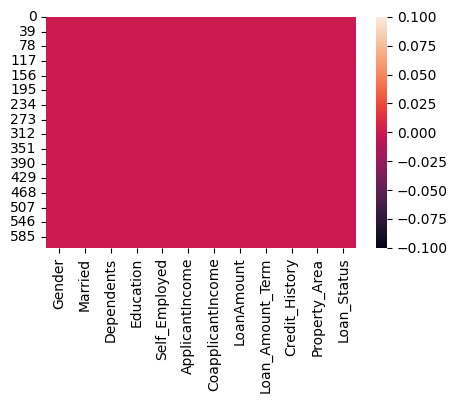

In [15]:
## we can also check null values through graph
plt.figure(figsize=(5, 3))
sns.heatmap(dataset.isnull())
plt.show()

**Correct Datatype**

In [16]:
dataset["Dependents"].replace("3+", "3", inplace=True)
dataset["Dependents"] = dataset["Dependents"].astype("int64")

#### Finding Outliers Through Graph

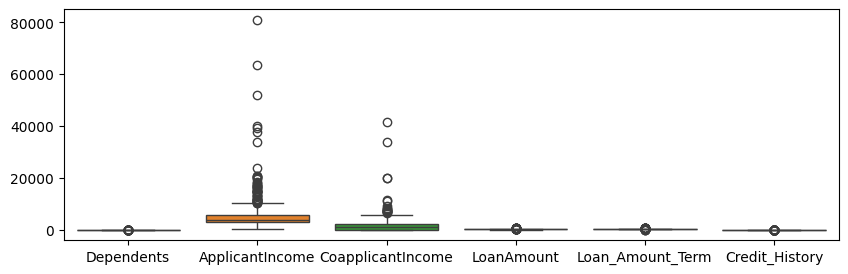

In [17]:
plt.figure(figsize=(10, 3))
sns.boxplot(data=dataset)
plt.show()

In [18]:
cols = ['ApplicantIncome', 'CoapplicantIncome']
new_df = dataset.copy()

for col in cols:
    q1 = new_df[col].quantile(0.25)
    q3 = new_df[col].quantile(0.75)
    IQR = q3 - q1

    min_range = q1 - 1.5 * IQR
    max_range = q3 + 1.5 * IQR

    new_df = new_df[(new_df[col] >= min_range) & (new_df[col] <= max_range)]


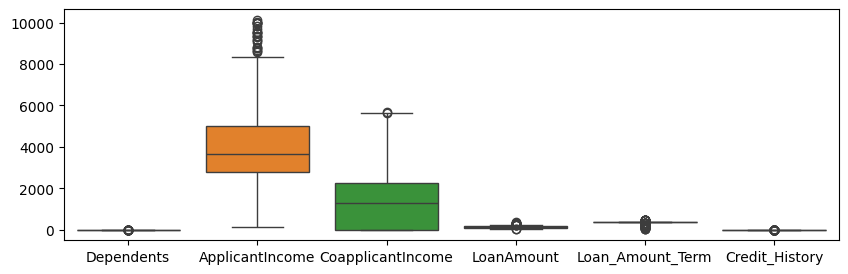

In [19]:
plt.figure(figsize=(10, 3))
sns.boxplot(data=new_df)
plt.show()


In [20]:
new_df.shape

(548, 12)

In [21]:
new_df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [22]:
## Ecoding Categorical Data
for j in new_df.select_dtypes(include=["object"]).columns:
    print(j, " : ", new_df[j].nunique())

Gender  :  2
Married  :  2
Education  :  2
Self_Employed  :  2
Property_Area  :  3
Loan_Status  :  2


In [23]:
en_data = new_df[['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area','Loan_Status']]

In [24]:
pd.get_dummies(en_data).info()

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Gender_Female            548 non-null    bool 
 1   Gender_Male              548 non-null    bool 
 2   Married_No               548 non-null    bool 
 3   Married_Yes              548 non-null    bool 
 4   Education_Graduate       548 non-null    bool 
 5   Education_Not Graduate   548 non-null    bool 
 6   Self_Employed_No         548 non-null    bool 
 7   Self_Employed_Yes        548 non-null    bool 
 8   Property_Area_Rural      548 non-null    bool 
 9   Property_Area_Semiurban  548 non-null    bool 
 10  Property_Area_Urban      548 non-null    bool 
 11  Loan_Status_N            548 non-null    bool 
 12  Loan_Status_Y            548 non-null    bool 
dtypes: bool(13)
memory usage: 11.2 KB


In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
ohe = OneHotEncoder(drop="first")

In [27]:
ohe.fit(en_data)

,categories,'auto'
,drop,'first'
,sparse_output,True
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [28]:
arr = ohe.transform(en_data).toarray()

In [29]:
column = ohe.get_feature_names_out(en_data.columns)
encoded_df = pd.DataFrame(arr, columns=column)

In [30]:
new_df = new_df.reset_index(drop=True)
encoded_df = encoded_df.reset_index(drop=True)

final_df = pd.concat([new_df.drop(columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area','Loan_Status']),
                      encoded_df], axis=1)


In [31]:
final_df.sample(10)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
336,0,4817,923.0,120.0,180.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
139,0,2980,2083.0,120.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
124,2,5042,2083.0,185.0,360.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,3000,0.0,66.0,360.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
25,2,4226,1040.0,110.0,360.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
355,2,3100,1400.0,113.0,360.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
539,0,2400,3800.0,128.0,180.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
368,1,8300,0.0,152.0,300.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
62,3,7100,0.0,125.0,60.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
428,2,2873,1872.0,132.0,360.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


## feature Scalling 

**Before Transformation**

<Figure size 1600x1200 with 0 Axes>

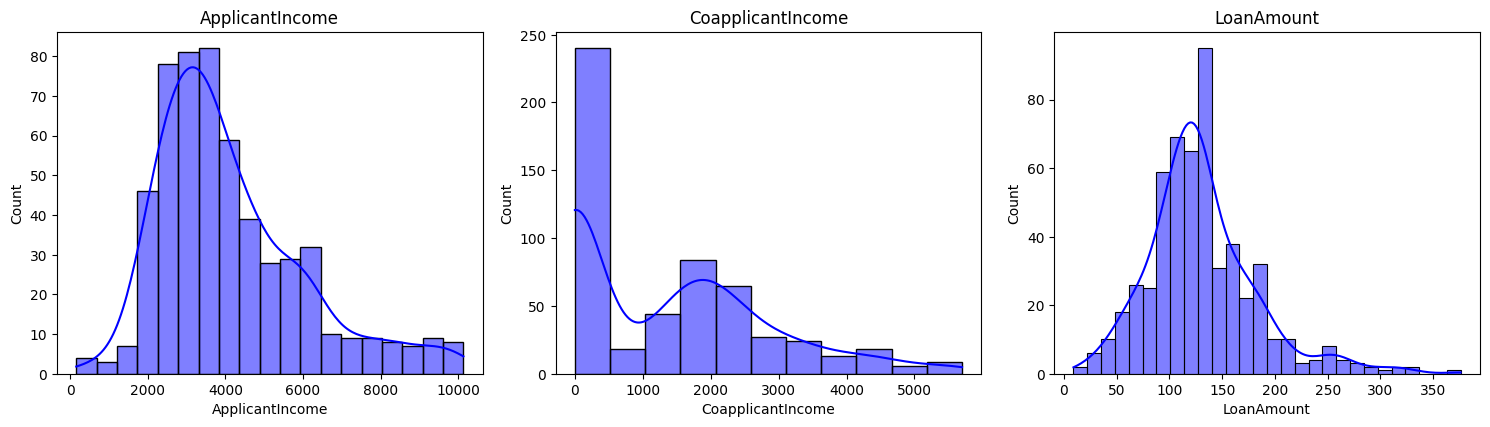

In [32]:
import math
plt.figure(figsize=(16, 12))

cols = final_df[["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]]
total = len(cols)
rows = math.ceil(total/3)

plt.figure(figsize=(15, rows*4))

for i, col in enumerate(cols, 1):

    plt.subplot(rows, 3, i)
    sns.histplot(data=final_df[col], kde=True, color="blue")
    plt.title(col)

plt.tight_layout()
plt.show()



In [33]:
skewed_df = final_df[["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]]

In [34]:
skewed_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,548.000000,548.000000,548.000000
mean,4128.978102,1359.425036,130.501825
std,1907.396960,1458.228533,51.565528
min,150.000000,0.000000,9.000000
25%,2768.750000,0.000000,100.000000
50%,3656.000000,1293.500000,125.000000
75%,5000.000000,2250.000000,155.000000
max,10139.000000,5701.000000,376.000000


In [35]:
## Here we are using log tranformation to reduce skewness in dataset
from sklearn.preprocessing import FunctionTransformer
ft = FunctionTransformer(np.log1p)
n1 = ft.fit_transform(skewed_df)

<Figure size 1600x1200 with 0 Axes>

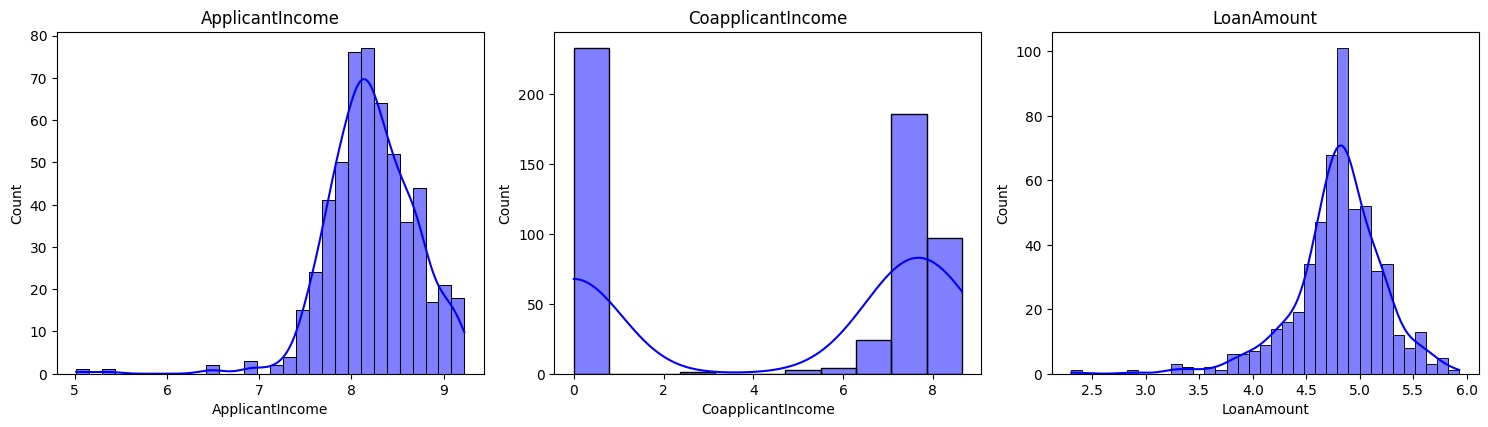

In [36]:
## In this graph you can see the clear difference after reduce skewness in dataset
import math
plt.figure(figsize=(16, 12))

cols = n1[["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]]
total = len(cols)
rows = math.ceil(total/3)

plt.figure(figsize=(15, rows*4))

for i, col in enumerate(cols, 1):

    plt.subplot(rows, 3, i)
    sns.histplot(data=n1[col], kde=True, color="blue")
    plt.title(col)

plt.tight_layout()
plt.show()



In [37]:
final_df = pd.concat([final_df.drop(columns=["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]), n1], axis=1)

### Using Standard Scalling 

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
cols_to_scale = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]
n2 = final_df[cols_to_scale]

In [40]:
ss = StandardScaler()

In [41]:
ss.fit(n2)

,copy,True
,with_mean,True
,with_std,True


In [42]:
arr1 = ss.transform(n2)
scaled_df = pd.DataFrame(arr1, columns=cols_to_scale, index=final_df.index)
final_df = final_df.drop(columns=cols_to_scale)
final_df1 = pd.concat([final_df, scaled_df], axis=1)

C:\Users\Noman Traders\AppData\Local\Temp\ipykernel_7672\2651059615.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n2["ApplicantIncome"])
C:\Users\Noman Traders\AppData\Local\Temp\ipykernel_7672\2651059615.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df1["ApplicantIncome"])


<Axes: title={'center': 'After Scalling'}, xlabel='ApplicantIncome', ylabel='Density'>

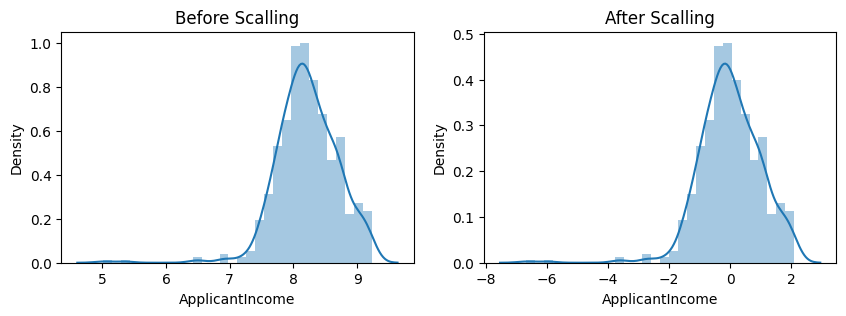

In [43]:
## Here we can check out scalling results 
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.title("Before Scalling")
sns.distplot(n2["ApplicantIncome"])

plt.subplot(1, 2, 2)
plt.title("After Scalling")
sns.distplot(final_df1["ApplicantIncome"])


In [44]:
final_df1.describe()

,Dependents,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02
mean,0.720803,0.855839,0.815693,0.649635,0.239051,0.116788,0.381387,0.319343,0.693431,-1.901156e-15,-4.051909e-17,-1.468412e-15,1.361441e-16
std,0.997513,0.351573,0.388088,0.477520,0.426894,0.321461,0.486171,0.466648,0.461490,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.682554e+00,-1.154707e+00,-5.916082e+00,-5.118207e+00
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.141444e-01,-1.154707e+00,-4.355410e-01,2.623940e-01
50%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-3.449904e-02,7.306369e-01,8.859540e-02,2.623940e-01
75%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,6.183825e-01,8.762007e-01,5.947505e-01,2.623940e-01
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.092811e+00,1.120738e+00,2.685949e+00,2.117774e+00


In [45]:
final_df1.sample(5)

,Dependents,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
157,1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.018441,-1.154707,-0.087035,0.262394
293,0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.934379,0.865465,0.998823,0.262394
401,2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.223008,0.804033,0.517547,0.262394
198,0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.083757,-1.154707,0.144361,0.262394
50,2,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,-0.660405,0.703585,-0.507002,0.262394


### Now we Find out relationship b/w the columns data

In [46]:
final_df1.corr()

,Dependents,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Dependents,1.000000,-0.031572,0.187957,0.335417,0.079744,0.073366,0.023946,-0.000552,0.020233,0.123262,-0.014452,0.103465,-0.090496
Credit_History,-0.031572,1.000000,0.005893,0.003497,-0.086666,0.019836,0.044168,-0.008601,0.560916,0.033135,0.010120,-0.006730,-0.016121
Gender_Male,0.187957,0.005893,1.000000,0.371048,0.067799,0.026313,-0.111233,0.053034,0.041203,0.087169,0.229167,0.147329,-0.076701
Married_Yes,0.335417,0.003497,0.371048,1.000000,0.025988,0.016951,0.017531,0.010779,0.084109,-0.024599,0.346905,0.178411,-0.086958
Education_Not Graduate,0.079744,-0.086666,0.067799,0.025988,1.000000,-0.003987,-0.052514,-0.026007,-0.109865,-0.145800,0.037631,-0.108835,-0.076792
Self_Employed_Yes,0.073366,0.019836,0.026313,0.016951,-0.003987,1.000000,0.030311,-0.066272,-0.004677,0.149000,-0.093993,0.092693,-0.060605
Property_Area_Semiurban,0.023946,0.044168,-0.111233,0.017531,-0.052514,0.030311,1.000000,-0.537821,0.147262,0.019644,-0.018923,0.032245,0.065226
Property_Area_Urban,-0.000552,-0.008601,0.053034,0.010779,-0.026007,-0.066272,-0.537821,1.000000,-0.045420,-0.063058,-0.025113,-0.122489,-0.101312
Loan_Status_Y,0.020233,0.560916,0.041203,0.084109,-0.109865,-0.004677,0.147262,-0.045420,1.000000,0.006623,0.092835,-0.021232,-0.026135
ApplicantIncome,0.123262,0.033135,0.087169,-0.024599,-0.145800,0.149000,0.019644,-0.063058,0.006623,1.000000,-0.337552,0.410322,-0.060934


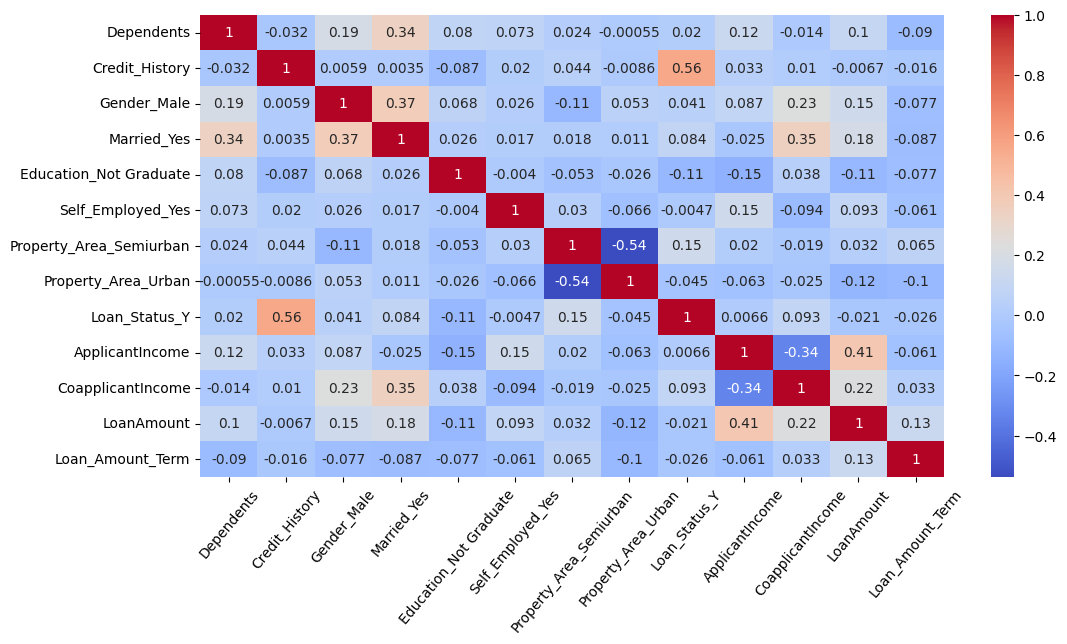

In [47]:
plt.figure(figsize=(12, 6))
sns.heatmap(final_df1.corr(), annot=True, cmap="coolwarm")
plt.xticks(rotation=50)
plt.show()

#### Multi-Stage Feature Selection Pipeline

In [48]:
#1) Percentile-Based Variance
variance = final_df1.var()
p10 = variance.quantile(0.10)
p25 = variance.quantile(0.25)

print("=== Percentile-Based Threshold ===\n")
print("p10 Thhreshold: ", p10)
print("p25 Threshold: ", p25)
print("\nFeature above p10: ", variance[variance > p10].index.tolist())
print("Feature above p25: ", variance[variance > p25].index.tolist())


#2) Signal-To-Noise Ratio (Snr)

target = "Loan_Status_Y"

if target in final_df1.columns:
    target_var = final_df1[target].var()

    snr = variance / target_var
    print("\n=== SNR Values ===")
    print(snr)


#3) STABLITY VARIANCE ANALYSIS

kf = KFold(n_splits=5, shuffle=True, random_state=42)
stability_matrix = []

for train_idx, _ in kf.split(final_df1):

    split_var = final_df1.iloc[train_idx].var()
    stability_matrix.append(split_var)

stability_matrix = pd.DataFrame(stability_matrix)
stability_std = stability_matrix.std()

print("\n=== Variance Stability (STD across split) ===")
print(stability_std)

stable_features = stability_std[stability_std < 0.05].index.tolist()
print("\nStable feature (<0.05 STD): ", stable_features)


# 4) FINAL PROFESSIONAL DECISION
correlation = final_df1.corrwith(final_df1["Loan_Status_Y"]).abs()
aligned_corr = correlation.reindex(variance.index).fillna(0)
final_keep = variance[(variance > p10) | (aligned_corr > 0.1)].index.tolist()

print("\n=== FINAL RECOMMENDED FEATURES ===")
print(final_keep)


=== Percentile-Based Threshold ===

p10 Thhreshold:  0.12900559121418756
p25 Threshold:  0.18223822041927437

Feature above p10:  ['Dependents', 'Gender_Male', 'Married_Yes', 'Education_Not Graduate', 'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
Feature above p25:  ['Dependents', 'Married_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

=== SNR Values ===
Dependents                 4.672102
Credit_History             0.580373
Gender_Male                0.707190
Married_Yes                1.070677
Education_Not Graduate     0.855686
Self_Employed_Yes          0.485213
Property_Area_Semiurban    1.109821
Property_Area_Urban        1.022478
Loan_Status_Y              1.000000
ApplicantIncome            4.704010
CoapplicantIncome          4.704010
LoanAmount                 4.704010
Loan_Amount_Ter

In [49]:
final_df1 = final_df1[['Dependents', 'Credit_History', 'Gender_Male', 'Married_Yes', 'Education_Not Graduate',
 'Property_Area_Semiurban', 'Property_Area_Urban','Loan_Status_Y', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]
x = final_df1.drop("Loan_Status_Y", axis=1)
y = final_df1["Loan_Status_Y"]

In [50]:
final_df1 = final_df1.reset_index(drop=True)

**Split data in training and testing**

In [51]:
x_train,  x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 , random_state=42)

**Apply Multiple Linear Regression**

In [52]:
lr = LogisticRegression()

In [53]:
lr.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [54]:
accuracy = lr.score(x_test, y_test)*100
print("Model Accuracy: ", accuracy)

Model Accuracy:  82.72727272727273
